# Regresión Lineal simple

## Problema

Se tienen un conjunto de observaciones ${(x_1^{(1)},y^{(1)}),(x_1^{(2)},y^{(2)}),(x_1^{(3)},y^{(3)}),...,(x_1^{(N)},y^{(N)})}$. Llamaremos a la variable $x_1$ predictor o feature. Llamaremos a la variable y, respuesta o salida (target en inglés).  
La idea es construir un modelo que aprenda a **predecir** o **estimar** la respuesta y en función de un predictor $x_1$. A esta predicción o estimación la llamaremos en general $\hat{y}$.

## Modelo

La regresión lineal es un método para predecir una respuesta **cuantitativa** usando una variable como referencia, también llamada predictor (o feature en inglés). El modelo propuesto para estimar la y en función del predictor $x_1$ es:

$\hat{y} = \omega_0 + \omega_1x_1$

¿Qué representa cada término?
- $\hat{y}$ Es la respuesta estimada por el modelo. Si mi modelo funciona perfectamente $\hat{y} = y$, para todas las observaciones.
- $x$ es el predictor (feature) 
- $\omega_0$ es el bias del modelo (también llamado intercept en inglés)
- $\omega_1$ es el coeficiente correspondiente a $x_1$

A $\omega_0$ y $\omega_1$ se los denomina **parámetros del modelo**. Entrenar o ajustar el modelo (fit) consiste en seleccionar los valores de $\omega_0$ y $\omega_1$ que minimizan una función de costo.

### Ejemplo 1: Estimación de la ganancia a partir de ítems vendidos

Supongamos que existe un emprendimiento que **informa ganancias y cantidad de productos vendidos por mes**. En una primera aproximación, supongamos que las ganancias cumplen perfectamente con la forma:

$$y=a.x-b$$
Donde:

- x: es la cantidad de ítems vendidos
- y: es la ganancia del mes
- b: es el costo fijo mensual (tiene sentido que sea un valor negativo)
- a: es el margen que aporta vender un producto

Es decir, mi ganancia mensual es igual a la cantidad de productos que vendí en un mes, multiplicado con el margen que aportó vender cada uno de esos productos, menos el costo fijo mensual. Supongamos que en cada mes, tanto el costo fijo como el margen que aporta vender un producto, no cambian.  
En esta situación ideal, sería lógico plantear el siguiente modelo:

$$\hat{y}=\omega_1x_1+\omega_0$$

Para obtener los valores de $\omega_0$ y $\omega_1$ puedo tomar el informe de dos meses distintos y despejar los valores de los **parámetros del modelo**.  
Supongamos que los informes de cuatro meses seguidos son:
$$ (ganancia, ítems)=[(-1250,100),(16520,1500),(7500,800),(3750,500)] $$  

Entonces planteo las ecuaciones:

$$ -1250=100.\omega_1 + \omega_0 $$
$$ 16520=1500.\omega_1 + \omega_0 $$

De las cuales se despeja que:  

$$ \omega_0=-2500 $$
$$ \omega_1=12.5 $$

Por lo tanto:

Costo fijo: $b=2500$  
Margen por producto: $a=12.5$

Con estos valores, puedo armar una función que en base a la cantidad de ítems vendidos me diga cual fue la ganancia para cada mes.

In [58]:
def ganancia(cantidad):
    return cantidad*12.5-2500

Podemos chequear la validez del modelo elegido, prediciendo los valores de ganancia para las ventas que no se utilizaron para ajustar los parámetros del modelo:

In [63]:
cantidad=800
print("La ganancia esperada cuando se venden {} productos es de {} pesos".format(cantidad,ganancia(cantidad)))

La ganancia esperada cuando se venden 800 productos es de 7500.0 pesos


In [64]:
cantidad=500
print("La ganancia esperada cuando se venden {} productos es de {} pesos".format(cantidad,ganancia(cantidad)))

La ganancia esperada cuando se venden 500 productos es de 3750.0 pesos


A lo largo del curso utilizaremos para armar modelos y entrenarlos una herramienta llamada Keras. Si bien dicha herramienta no se justifica para un modelo tan simple, será mas fácil ir utilizándola desde ahora e ir aumentando de a poco la complejidad de los modelos.  
Veamos cómo se define el mismo modelo anterior en Keras.
Lo primero que vamos a hacer es definir un modelo *secuencial*. Este tipo de modelos está compuesto por capas y la idea es que la salida de una capa es enviada a la entrada de la siguiente. Veamos cómo se define en el código

In [78]:
import numpy as np
from keras.models import Sequential #Para poder definir un modelo secuencial
model=Sequential() #Queda definido el modelo sequencial

En este punto contamos con un modelo secuencial vacío. Vamos a definir una capa densa. Veremos mas adelante en detalle las particularidades. Por el momento alcanza con saber que la siguiente línea:  

Dense(1, input_shape=(1,))

Define una capa densa de una entrada y una salida. Una capa densa de una entrada y una salida, calcula la salida en función de la entrada según:

$$out=\omega_1.in+\omega_0$$

Para agregar esa capa a nuestro modelo secuencial debemos hacerlos con la siguiente línea:

In [79]:
from keras.layers import Dense #Para poder usar capas densas
model.add(Dense(1, input_shape=(1,)))

Hemos definido la capa densa de una entrada y una salida, que equivale a la función lineal de nuestro modelo. Todavía no hemos definido el valor de los parámetros. Normalmente se inicializan con valores aleatorios. Podemos verificar los valores de los parámetros de una capa con la siguiente línea:

In [80]:
a=model.layers[0].get_weights()
print("Los pesos que inicialmente tiene el modelo son: {}".format(a))

Los pesos que inicialmente tiene el modelo son: [array([[-0.32453287]], dtype=float32), array([0.], dtype=float32)]


El primer valor corresponde a $\omega_1$ y el segundo valor corresponde a $\omega_0$. Si bien muy raramente estos valores se definen a mano (mas adelante veremos por qué), los podemos definir con las siguientes líneas:

In [81]:
model.layers[0].set_weights([np.array([[12.5]], dtype=np.float32), np.array([-2500], dtype=np.float32)])
a=model.layers[0].get_weights()
print("Los pesos que ahora tiene el modelo son: {}".format(a))

Los pesos que ahora tiene el modelo son: [array([[12.5]], dtype=float32), array([-2500.], dtype=float32)]


Por último, supongamos que queremos utilizar nuestro modelo para predecir ganancias para otros valores de cantidad de ítems vendido, lo hacemos con el método:

model.predict()

de la siguiente forma:

In [82]:
x1=np.array([[100],[1500],[800],[500]]) #Cantidad de items vendidos en un mes
model.predict(x1)

array([[-1250.],
       [16250.],
       [ 7500.],
       [ 3750.]], dtype=float32)

### Ejemplo 2: Altura de una persona a partir de su peso

Supongamos que ahora estamos ante la presencia de datos que no ajustan perfectamente a un modelo como el que vimos antes:

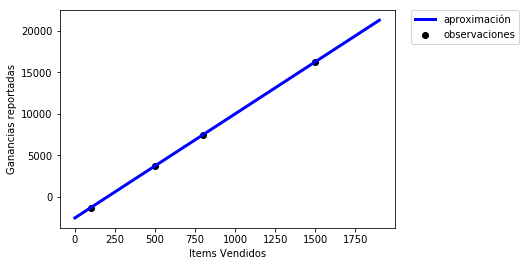

In [87]:
import matplotlib.pyplot as plt
#Veamos cómo da la aproximación buscada, y comparemosla con los datos medidos
x=np.arange(0,2000,100)
y=12.5*x-2500
plt.scatter(x1, 12.5*x1-2500,  color='black', label='observaciones')
plt.plot(x, y, color='blue', linewidth=3,label='aproximación')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Items Vendidos')
plt.ylabel('Ganancias reportadas')
plt.show()

Sino que tenemos datos que se apartan de un comportamiento perfectamente lineal. Esto se correspondería a una situación mas realista ya que, por ejemplo en el caso anterior, el costo fijo mensual no suele ser perfectamente constante, así como el margen de ganancia tampoco. 
Pongamos un ejemplo donde los datos son claramente ruidosos: Queremos estimar la altura de una persona a partir de su peso.

In [90]:
import pandas as pd
df = pd.read_csv('alturas-pesos.csv')
df.head() #Para visualizar las primeras 5 observaciones

,Sexo,Peso,Altura
0,Hombre,109,187
1,Hombre,73,174
2,Hombre,96,188
3,Hombre,99,182
4,Hombre,93,177


In [94]:
df.describe() #Para visualizar algunos valores estadísticos del dataset

,Peso,Altura
count,10000.000000,10000.000000
mean,72.733900,168.073300
std,14.572204,9.775269
min,29.000000,137.000000
25%,61.000000,161.000000
50%,73.000000,168.000000
75%,84.000000,175.000000
max,122.000000,200.000000


In [97]:
y = df['Altura'].values
x1 = df['Peso'].values
print(x1) #Imprimo pesos

[109  73  96 ...  58  74  51]


In [98]:
print(y) #imprimo alturas

[187 174 188 ... 162 175 157]


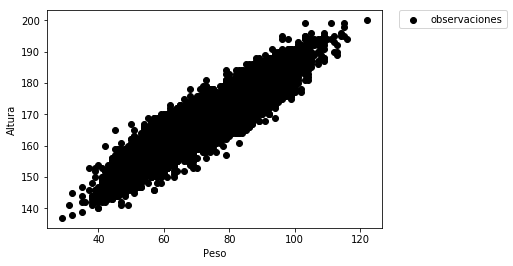

In [100]:
plt.scatter(x1, y,  color='black', label='observaciones')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Peso')
plt.ylabel('Altura')
plt.show()

En este caso será imposible determinar un modelo lineal que ajuste perfectamente a todas las observaciones. Por ello tenemos que definir algún criterio para ajustar los parámetros. Ese criterio estará dado en forma de una función de costo.

## Función de costo

La función de costo debe ser una medida de qué tan bien el modelo ajusta en base a $x_1$ los valores de $y$, es decir, cuán bien se aproximan los valores de $\hat{y}$ a los valores de $y$.
Una función que nos puede servir para medir qué tan bien el modelo se ajusta a los datos es ir sumando para cada observación $i$, la diferencia entre la predicción $\hat{y}$ y la respuesta esperada $y$. Tómese unos segundos para convencerse de que esta medida es una medida lógica. Ayúdese con el siguiente gráfico:  

<img src="08_estimating_coefficients.png">

Debate:

- ¿Se podría reemplazar $(\hat{y}_i - y_{i})^{2}$ por $|\hat{y}_i - y_{i}|$?

A esta función de costo se la conoce como Residual Sum of Squares ($SS_{Residual}$). Como en general en Machine Learning trabajamos con un número muy grande de observaciones, nos conviene normalizarla por el número de observaciones, para que este valor no crezca mucho:  

$$ MSE=\frac{1}{N} \sum_{i=1}^{N}{(\hat{y}-y)^{2}} $$

A esta medida del error de las predicciones con respecto a la respuesta deseada se la llama Mean Square Error, o Error Cuadrático Medio.

**El objetivo es encontrar los parámetros del modelo que minimizan la función de costo**

Dichos parámetros nos darán el modelo que mejor aproxima a estas observaciones. Existen distintas herramientas para encontrar los parámetros del modelo. A estas herramientas se las denomina **optimizadores**. Por el momento haremos uso de ellos sin entrar en detalle. Pero junto con la definición de la función de costo, siempre debemos definir un optimizador que nos permita hallar los parámetros que la minimizan.

### Ejemplo 2b: Altura de una persona a partir de su peso

Veamos cómo implementar el problema de pesos y alturas en Python. Para este caso, se pone mucho mas interesante la implementación en Keras, ya que Keras me permite definir además del modelo una función de costo asociada y su optimizador.

In [356]:
import numpy as np
from keras.models import Sequential #Para poder definir un modelo secuencial
from keras.layers import Dense, BatchNormalization #Para poder usar capas densas
from keras.optimizers import SGD, Adam
model=Sequential() #Queda definido el modelo sequencial
#model.add(BatchNormalization())
model.add(Dense(1, input_shape=(1,)))
#sgd = SGD(lr=0.000001)
model.compile(optimizer=Adam(lr=0.1), loss='mse') #defino el MSE como función de costo y sgd como optimizador

Podemos ver cómo queda el modelo utilizando el método *summary*.

In [357]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_59 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


Ahora pasemosle al modelo las observaciones para que ajuste los parámetros de forma tal que minimicen la función de costo. Esto se hace utilizando el método fit.

In [358]:
import random
index=np.arange(10000)
np.random.shuffle(index)
x1_train=x1[index[:8000]]
y_train=y[index[:8000]]
x1_test=x1[index[8000:]]
y_test=y[index[8000:]]

# Train the model, iterating on the data in batches of 256 samples
history=model.fit(x1_train, y_train, validation_data=[x1_test,y_test],epochs=50,verbose=1, batch_size=64,shuffle = True) 

Train on 8000 samples, validate on 2000 samples
Epoch 1/50
8000/8000 [==============================] - 0s 58us/step - loss: 4072.4612 - val_loss: 566.1221
Epoch 2/50
8000/8000 [==============================] - 0s 27us/step - loss: 562.7660 - val_loss: 554.3204
Epoch 3/50
8000/8000 [==============================] - 0s 16us/step - loss: 550.6361 - val_loss: 538.4780
Epoch 4/50
8000/8000 [==============================] - 0s 16us/step - loss: 534.0599 - val_loss: 523.6150
Epoch 5/50
8000/8000 [==============================] - 0s 16us/step - loss: 516.4601 - val_loss: 503.6668
Epoch 6/50
8000/8000 [==============================] - 0s 16us/step - loss: 496.8929 - val_loss: 481.9009
Epoch 7/50
8000/8000 [==============================] - 0s 16us/step - loss: 475.2223 - val_loss: 462.7839
Epoch 8/50
8000/8000 [==============================] - 0s 16us/step - loss: 452.7038 - val_loss: 438.7436
Epoch 9/50
8000/8000 [==============================] - 0s 16us/step - loss: 428.6270 - val_los

In [359]:
model.layers[0].get_weights()

[array([[0.6210806]], dtype=float32), array([122.39417], dtype=float32)]

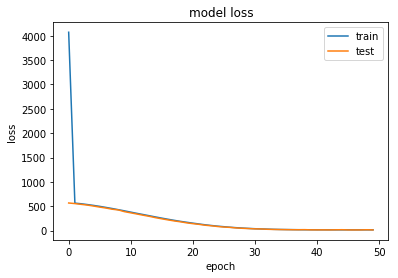

In [360]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

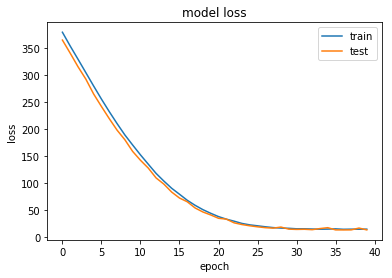

In [361]:
# summarize history for loss
plt.plot(history.history['loss'][10:])
plt.plot(history.history['val_loss'][10:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

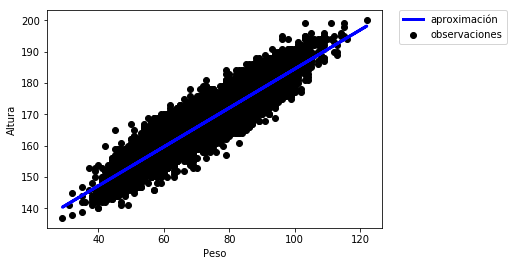

In [365]:
plt.scatter(x1, y,  color='black', label='observaciones')
plt.plot(x1, model.predict(x1), color='blue', linewidth=3,label='aproximación')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Peso')
plt.ylabel('Altura')
plt.show()

## Optimizadores

Para entender qué es lo que hacen los optimizadores se recomienda ver la notebook de [optimizadores](optimizadores1.ipynb)

## Discusión

¿Cómo se podría incorporar la información del sexo, para estimar la altura?